# Dataset Haberna's Survival

Dataset ini mencakup kasus-kasus dari tahun 1958 hingga 1970, berasal dari penelitian di Rumah Sakit Billings, Universitas Chicago. Penelitian ini fokus pada kelangsungan hidup pasien setelah menjalani operasi kanker payudara.

## Tujuan Analisis

Penelitian ini bertujuan untuk memprediksi kelangsungan hidup pasien berdasarkan data yang tersedia. Analisis ini dapat membantu dalam pengambilan keputusan klinis dan perawatan pasien di masa depan.

In [ ]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
haberman_s_survival = fetch_ucirepo(id=43) 
  
# data (as pandas dataframes) 
X = haberman_s_survival.data.features 
y = haberman_s_survival.data.targets 
  
# metadata 
print(haberman_s_survival.metadata) 
  
# variable information 
print(haberman_s_survival.variables) 


{'uci_id': 43, 'name': "Haberman's Survival", 'repository_url': 'https://archive.ics.uci.edu/dataset/43/haberman+s+survival', 'data_url': 'https://archive.ics.uci.edu/static/public/43/data.csv', 'abstract': 'Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 306, 'num_features': 3, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['survival_status'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1976, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5XK51', 'creators': ['S. Haberman'], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
haberman_s_survival = fetch_ucirepo(id=43)

# Data (as pandas dataframes)
X = haberman_s_survival.data.features
y = haberman_s_survival.data.targets

# Combine features and target into one dataframe
data = pd.concat([X, y], axis=1)

# Save to CSV
data.to_csv('haberman_s_survival.csv', index=False)

# Display the entire dataframe
print(data.head(len(data)))





     age  operation_year  positive_auxillary_nodes  survival_status
0     30              64                         1                1
1     30              62                         3                1
2     30              65                         0                1
3     31              59                         2                1
4     31              65                         4                1
..   ...             ...                       ...              ...
301   75              62                         1                1
302   76              67                         0                1
303   77              65                         3                1
304   78              65                         1                2
305   83              58                         2                2

[306 rows x 4 columns]


## Menarik Data

In [ ]:
import pandas as pd

# URL dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

# Kolom dalam dataset
columns = ['Age', 'Year', 'Nodes', 'Status']

# Membaca data ke dalam DataFrame
df = pd.read_csv(url, header=None, names=columns)

# Menampilkan DataFrame
df


,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


## Plotting Data

### Data Distribution

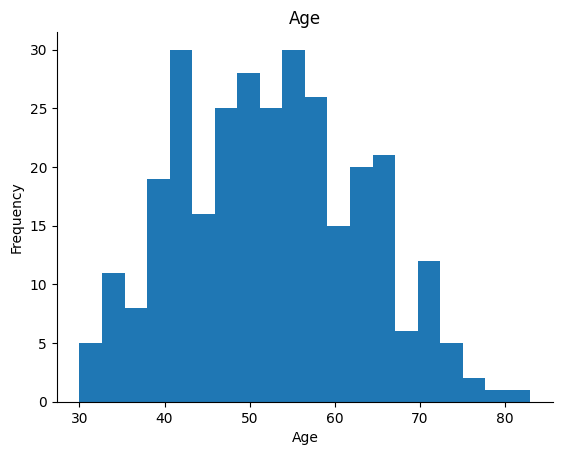

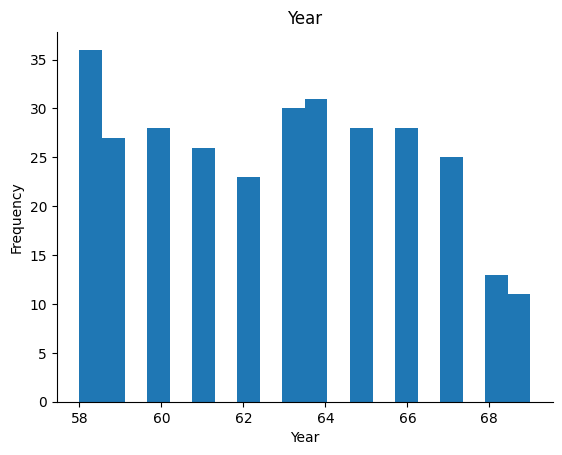

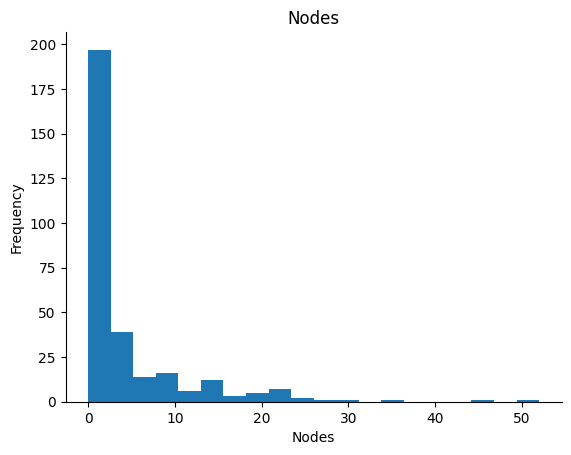

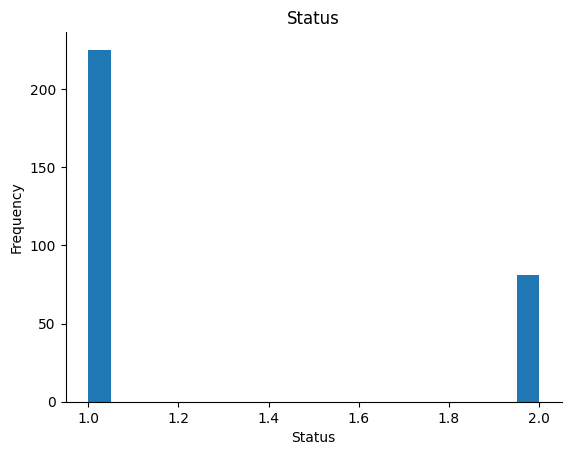

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# URL dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

# Kolom dalam dataset
columns = ['Age', 'Year', 'Nodes', 'Status']

# Membaca data ke dalam DataFrame
df = pd.read_csv(url, header=None, names=columns)

# Plotting histogram untuk setiap fitur
features = ['Age', 'Year', 'Nodes', 'Status']

for feature in features:
    df[feature].plot(kind='hist', bins=20, title=feature)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### 2D Distribution

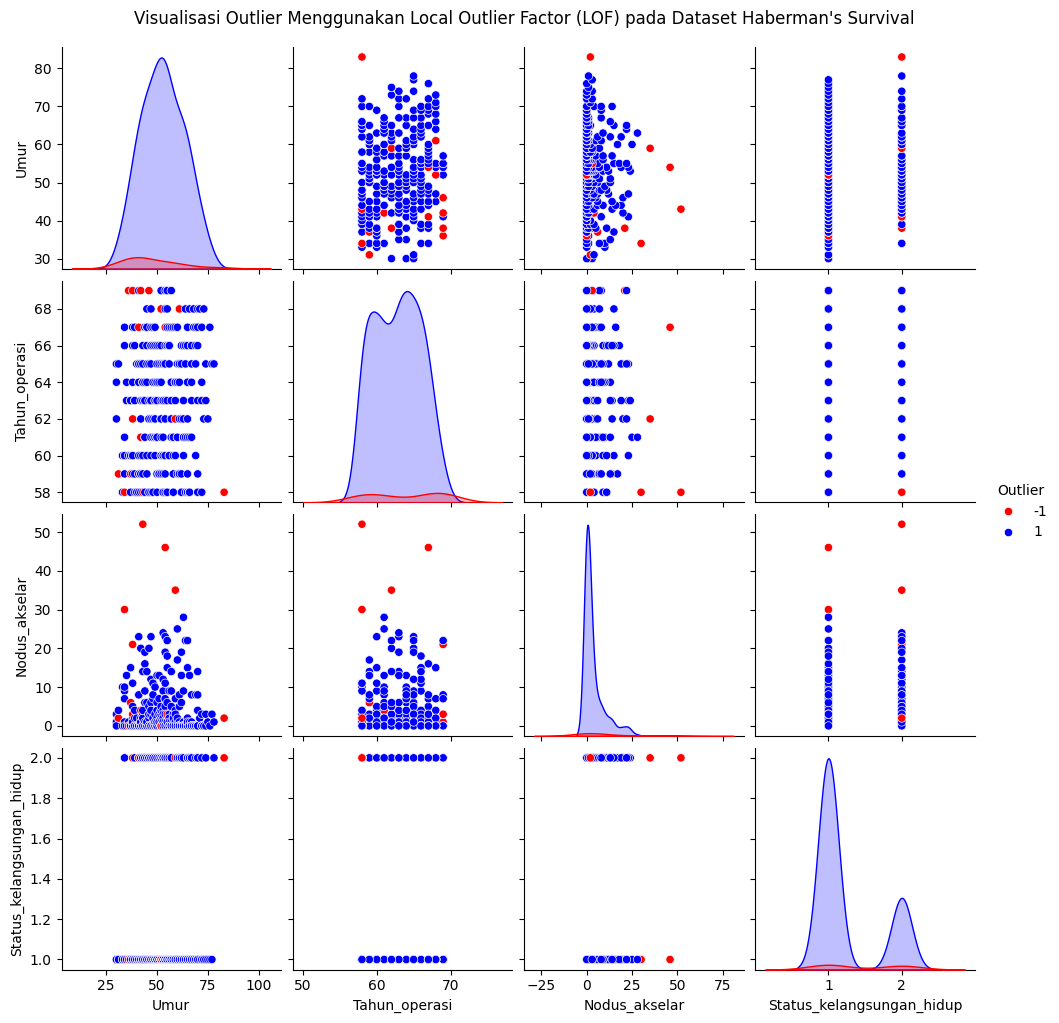

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Memuat dataset "Haberman's Survival"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
kolom = ['Umur', 'Tahun_operasi', 'Nodus_akselar', 'Status_kelangsungan_hidup']
df = pd.read_csv(url, names=kolom)

# Asumsi df adalah DataFrame Anda dengan kolom-kolom yang relevan
# Mengonversi kolom yang dipilih menjadi array numpy
X = df[['Umur', 'Tahun_operasi', 'Nodus_akselar']].values

# Menerapkan Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=3)
y_pred = lof.fit_predict(X)

# Menambahkan prediksi outlier ke DataFrame
df['Outlier'] = y_pred

# Menampilkan plot pasangan (pair plot)
pair_plot = sns.pairplot(df, hue='Outlier', palette={1: 'blue', -1: 'red'}, diag_kind='auto')

# Menambahkan judul
pair_plot.fig.suptitle('Visualisasi Outlier Menggunakan Local Outlier Factor (LOF) pada Dataset Haberman\'s Survival', y=1.02)

# Menampilkan plot
plt.show()


## Explorasi Data

In [ ]:
# Menampilkan statistik deskriptif untuk kolom yang relevan
df[['Umur', 'Tahun_operasi', 'Nodus_akselar']].describe()

,Umur,Tahun_operasi,Nodus_akselar
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


### Tipe Data

Melihat jumlah kolom dan baris pada dataset Haberman's Survival

In [ ]:
df.shape

(306, 5)

### Deskripsi Statistik Sederhana

In [ ]:
df.describe()

,Umur,Tahun_operasi,Nodus_akselar,Status_kelangsungan_hidup,Outlier
count,306.000000,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706,0.882353
std,10.803452,3.249405,7.189654,0.441899,0.471359
min,30.000000,58.000000,0.000000,1.000000,-1.000000
25%,44.000000,60.000000,0.000000,1.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000,1.000000
max,83.000000,69.000000,52.000000,2.000000,1.000000


### Jumlah Data Setiap Class

In [ ]:
count_per_class = df['Status_kelangsungan_hidup'].value_counts()

## Kualitas Data

### Mencari Missing Value

In [ ]:
df.isnull().sum()

Umur                         0
Tahun_operasi                0
Nodus_akselar                0
Status_kelangsungan_hidup    0
Outlier                      0
dtype: int64

### Data Outlier

# Data Pre-Processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Memuat dataset "Haberman's Survival"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
kolom = ['Umur', 'Tahun_operasi', 'Nodus_akselar', 'Status_kelangsungan_hidup']
df = pd.read_csv(url, names=kolom)

# Pisahkan fitur numerik
numeric_features = ['Umur', 'Tahun_operasi', 'Nodus_akselar']
df_numeric = df[numeric_features]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data numerik
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Gabungkan kembali dengan kolom 'Status_kelangsungan_hidup'
df_normalized['Status_kelangsungan_hidup'] = df['Status_kelangsungan_hidup']

# Tampilkan hasil normalisasi
print(df_normalized.head())


       Umur  Tahun_operasi  Nodus_akselar  Status_kelangsungan_hidup
0  0.000000       0.545455       0.019231                          1
1  0.000000       0.363636       0.057692                          1
2  0.000000       0.636364       0.000000                          1
3  0.018868       0.090909       0.038462                          1
4  0.018868       0.636364       0.076923                          1


## Local Outlier Factor

Check Outlier

In [ ]:
# Inisialisasi Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=5, p=2)

# Fit dan prediksi dengan LOF
lof_predict = lof.fit_predict(df.drop(['Status_kelangsungan_hidup'], axis=1))

# Mengidentifikasi outlier
outlier_indices = df.index[lof_predict == -1]

# Menampilkan hasil outlier
print("Indeks yang diprediksi sebagai outlier:", outlier_indices)

Indeks yang diprediksi sebagai outlier: Index([9, 17, 21, 45, 47, 62, 174, 215, 281, 285, 305], dtype='int64')


In [ ]:
# Mengakses baris outlier dalam DataFrame
df.loc[outlier_indices]

,Umur,Tahun_operasi,Nodus_akselar,Status_kelangsungan_hidup
9,34,58,30,1
17,36,69,0,1
21,37,59,6,1
45,41,67,0,2
47,41,59,8,1
62,43,58,52,2
174,54,67,46,1
215,59,62,35,2
281,69,67,8,2
285,70,58,0,2


In [ ]:
df

,Umur,Tahun_operasi,Nodus_akselar,Status_kelangsungan_hidup
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Memuat dataset "Haberman's Survival"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
kolom = ['Umur', 'Tahun_operasi', 'Nodus_akselar', 'Status_kelangsungan_hidup']
df = pd.read_csv(url, names=kolom)

# Normalisasi data untuk LOF
scaler = StandardScaler()
numeric_features = ['Umur', 'Tahun_operasi', 'Nodus_akselar']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Inisialisasi dan fit LOF
lof = LocalOutlierFactor(n_neighbors=5, p=2)
lof_predict = lof.fit_predict(df.drop(['Status_kelangsungan_hidup'], axis=1))

# Mengidentifikasi outlier
outlier_indices = df.index[lof_predict == -1]

# Membuat salinan dari DataFrame untuk mengganti nilai outlier
df_replaced = df.copy()

# Mengganti nilai outlier dengan nilai median dari kolom masing-masing
for index in outlier_indices:
    for column in df_replaced.drop(['Status_kelangsungan_hidup'], axis=1).columns:
        median_value = df_replaced[column].median()
        if df_replaced[column].dtype == 'int64':
            median_value = int(median_value)
        df_replaced.loc[index, column] = median_value

# Kembali ke skala asli untuk kemudahan interpretasi
df_replaced[numeric_features] = scaler.inverse_transform(df_replaced[numeric_features])

# Menampilkan hasil akhir setelah penggantian outlier
print("Data setelah mengganti outlier dengan median:")
print(df_replaced.head())


Data setelah mengganti outlier dengan median:
   Umur  Tahun_operasi  Nodus_akselar  Status_kelangsungan_hidup
0  30.0           64.0            1.0                          1
1  52.0           63.0            1.0                          1
2  30.0           65.0            0.0                          1
3  31.0           59.0            2.0                          1
4  31.0           65.0            4.0                          1


# Data Modelling

## Gaussian Naive Bayes Classification

In [ ]:
import pandas as pd

# Memuat dataset "Haberman's Survival" dari UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
kolom = ['Umur', 'Tahun_operasi', 'Nodus_akselar', 'Status_kelangsungan_hidup']
df_haberman = pd.read_csv(url, names=kolom)

# Menyimpan DataFrame sebagai file CSV
df_haberman.to_csv("habermans_survival.csv", index=False)

# Menampilkan DataFrame
print(df_haberman)


     Umur  Tahun_operasi  Nodus_akselar  Status_kelangsungan_hidup
0      30             64              1                          1
1      30             62              3                          1
2      30             65              0                          1
3      31             59              2                          1
4      31             65              4                          1
..    ...            ...            ...                        ...
301    75             62              1                          1
302    76             67              0                          1
303    77             65              3                          1
304    78             65              1                          2
305    83             58              2                          2

[306 rows x 4 columns]


### KNN 1

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Memuat dataset "Haberman's Survival"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
kolom = ['Umur', 'Tahun_operasi', 'Nodus_akselar', 'Status_kelangsungan_hidup']
df = pd.read_csv(url, names=kolom)

# Memisahkan fitur dan label
feature_columns = ['Umur', 'Tahun_operasi', 'Nodus_akselar']
X = df[feature_columns].values
y = df['Status_kelangsungan_hidup'].values

# Mengencode label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat classifier dengan jumlah tetangga optimal
classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data latih
classifier.fit(X_train, y_train)

# Memprediksi data latih
y_train_pred = classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Akurasi data latih: {accuracy_train:.2f}')

# Memprediksi data uji
y_test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Akurasi data uji: {accuracy_test:.2f}')

# Memprediksi data baru
x_baru = [[30, 64, 1]]  # Sesuaikan data baru dengan dataset "Haberman's Survival"
x_baru_normalized = scaler.transform(x_baru)
y_baru_pred = classifier.predict(x_baru_normalized)
print("Prediksi untuk data inputan baru:", label_encoder.inverse_transform(y_baru_pred), "atau", y_baru_pred)


Akurasi data latih: 0.79
Akurasi data uji: 0.65
Prediksi untuk data inputan baru: [1] atau [0]


### KNN 2

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Memuat dataset "Haberman's Survival"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
kolom = ['Umur', 'Tahun_operasi', 'Nodus_akselar', 'Status_kelangsungan_hidup']
df = pd.read_csv(url, names=kolom)

# Memisahkan fitur dan label
feature_columns = ['Umur', 'Tahun_operasi', 'Nodus_akselar']
X = df[feature_columns].values
y = df['Status_kelangsungan_hidup'].values

# Mengencode label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat classifier dengan jumlah tetangga optimal
classifier = KNeighborsClassifier(n_neighbors=9)

# Melatih model dengan data latih
classifier.fit(X_train, y_train)

# Memprediksi data latih
y_train_pred = classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Akurasi data latih: {accuracy_train:.2f}')

# Memprediksi data uji
y_test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Akurasi data uji: {accuracy_test:.2f}')

# Memprediksi data baru
x_baru = [[30, 64, 1]]  # Sesuaikan data baru dengan dataset "Haberman's Survival"
x_baru_normalized = scaler.transform(x_baru)
y_baru_pred = classifier.predict(x_baru_normalized)
print("Prediksi untuk data inputan baru:", label_encoder.inverse_transform(y_baru_pred), "atau", y_baru_pred)


Akurasi data latih: 0.79
Akurasi data uji: 0.61
Prediksi untuk data inputan baru: [1] atau [0]


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Memuat dataset "Haberman's Survival"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
kolom = ['Umur', 'Tahun_operasi', 'Nodus_akselar', 'Status_kelangsungan_hidup']
df = pd.read_csv(url, names=kolom)

# Memisahkan fitur dan label
feature_columns = ['Umur', 'Tahun_operasi', 'Nodus_akselar']
X = df[feature_columns].values
y = df['Status_kelangsungan_hidup'].values

# Mengencode label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat classifier dengan jumlah tetangga optimal
classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier2 = KNeighborsClassifier(n_neighbors=9)

# Melatih model dengan data latih
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)

# Memprediksi data latih
c1tr = classifier1.predict(X_train)
c2tr = classifier2.predict(X_train)

# Menggabungkan prediksi dan label pada data latih
combined_df = pd.DataFrame({
    'P1': c1tr,
    'P2': c2tr,
    'Y': y_train
})

# Menyimpan DataFrame ke dalam file CSV
combined_df.to_csv('train_gabung.csv', index=False)

# Tampilkan DataFrame gabungan
print(combined_df.head())


   P1  P2  Y
0   0   0  0
1   0   0  0
2   0   0  1
3   0   0  0
4   0   0  1


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Memuat dataset "Haberman's Survival"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
kolom = ['Umur', 'Tahun_operasi', 'Nodus_akselar', 'Status_kelangsungan_hidup']
df = pd.read_csv(url, names=kolom)

# Memisahkan fitur dan label
feature_columns = ['Umur', 'Tahun_operasi', 'Nodus_akselar']
X = df[feature_columns].values
y = df['Status_kelangsungan_hidup'].values

# Mengencode label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat classifier dengan jumlah tetangga optimal
classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier2 = KNeighborsClassifier(n_neighbors=9)

# Melatih model dengan data latih
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)

# Memprediksi data latih
c1tr = classifier1.predict(X_train)
c2tr = classifier2.predict(X_train)

# Memprediksi data uji
c1tes = classifier1.predict(X_test)
c2tes = classifier2.predict(X_test)

# Menggabungkan prediksi dan label pada data uji
combined_df = pd.DataFrame({
    'P1': c1tes,
    'P2': c2tes,
    'Y': y_test
})

# Menyimpan DataFrame ke dalam file CSV
combined_df.to_csv('tes_gabung.csv', index=False)

# Tampilkan DataFrame gabungan
print(combined_df.head())


   P1  P2  Y
0   0   0  1
1   0   0  0
2   0   0  1
3   0   0  0
4   0   0  1


In [ ]:
import pandas as pd

# Membaca data dari file 'tes_gabung.csv'
df = pd.read_csv('tes_gabung.csv')

# Menampilkan beberapa baris pertama dari DataFrame
df.head()


,P1,P2,Y
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,1


### Menyimpan Dengan Pickle

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Contoh inisialisasi dan pelatihan model
meta_classifier = RandomForestClassifier()
meta_classifier.fit(X_train, y_train)  # Anda harus memiliki X_train dan y_train yang sudah ditentukan sebelumnya
y_pred = meta_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Cetak hasil akurasi
print(f"Akurasi model RandomForestClassifier: {accuracy:.2f}")
# Nama file untuk menyimpan model
pkl_file = "meta_c.pkl"

# Simpan model sebagai file pickle
with open(pkl_file, 'wb') as file:
    pickle.dump(meta_classifier, file)

# Memastikan bahwa model telah disimpan dengan benar
print(f"Model telah disimpan dalam file: {pkl_file}")


Akurasi model RandomForestClassifier: 0.65
Model telah disimpan dalam file: meta_c.pkl


In [ ]:
df

,age,operation_year,positive_auxillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
print(X_test.shape)


(62, 3)


In [ ]:
import pickle
from sklearn.metrics import classification_report

# Nama file pickle yang akan di-load
pkl_file = "meta_c.pkl"

# Load model dari file pickle
with open(pkl_file, 'rb') as file:  
    model = pickle.load(file)

# Evaluasi model menggunakan data uji (X_test, y_test)
y_predict = model.predict(X_test)

# Menampilkan hasil evaluasi (classification report)
print("Hasil Evaluasi Model:")
print(classification_report(y_test, y_predict))

# Melakukan prediksi untuk data baru ([[2 , 2]])
prediksi_baru = model.predict([[2 , 2, 2]])
print("Prediksi untuk data baru:", prediksi_baru)


Hasil Evaluasi Model:
              precision    recall  f1-score   support

           0       0.64      0.92      0.76        37
           1       0.67      0.24      0.35        25

    accuracy                           0.65        62
   macro avg       0.65      0.58      0.55        62
weighted avg       0.65      0.65      0.59        62

Prediksi untuk data baru: [0]


### Menyimpan dengan Joblib

In [ ]:
import joblib

# Simpan model menggunakan joblib
filename = 'model_joblib.sav'  
joblib.dump(meta_classifier, filename)


['model_joblib.sav']

In [ ]:
import joblib
from sklearn.metrics import classification_report

# Memuat model dari file joblib
filename = 'model_joblib.sav'  # Ganti dengan nama file yang digunakan saat menyimpan model
loaded_model = joblib.load(filename)

# Memprediksi data uji
y_predict = loaded_model.predict(X_test)

# Mengevaluasi hasil menggunakan classification_report
print("Hasil Evaluasi Model:")
print(classification_report(y_test, y_predict))


Hasil Evaluasi Model:
              precision    recall  f1-score   support

           0       0.64      0.92      0.76        37
           1       0.67      0.24      0.35        25

    accuracy                           0.65        62
   macro avg       0.65      0.58      0.55        62
weighted avg       0.65      0.65      0.59        62



In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 87.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: 'COPYING'


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Stacking Classifier  :Gaussian Naive Bayes Menggunakan library 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Membaca dataset Habermans Survival
data = pd.read_csv('haberman_s_survival.csv')

# Memisahkan fitur dan label dengan asumsi 'Status_kelangsungan_hidup' adalah kolom target
X = data[['age', 'operation_year', 'positive_auxillary_nodes']].values
y = data['survival_status'].values

# Mengencode label kelas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Membuat daftar estimator untuk StackingClassifier dengan pipeline untuk standardisasi
estimators = [(f'KNN {i}', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i))) for i in range(3, 30, 1)]

# Inisialisasi StackingClassifier dengan GaussianNB sebagai estimator akhir
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB()
)

# Melatih StackingClassifier
clf.fit(X_train, y_train)

# Mengevaluasi akurasi masing-masing model KNN pada data uji
for name, estimator in estimators:
    estimator.fit(X_train, y_train)  # Menggunakan data latih untuk fit estimator
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Akurasi {name}: {accuracy:.2f}")

# Mengevaluasi kinerja keseluruhan StackingClassifier
overall_accuracy = clf.score(X_test, y_test)
print(f'\nStacking Classifier:')
print(f'Akurasi: {overall_accuracy:.2f}')

# Membuat prediksi untuk data baru x_baru
x_baru = [[50, 65, 3]]
scaler = StandardScaler().fit(X_train)  # Fit scaler hanya pada data latih
x_baru_scaled = scaler.transform(x_baru)  # Transformasi data baru menggunakan scaler dari data latih
prediction = clf.predict(x_baru_scaled)
predicted_class = label_encoder.inverse_transform(prediction)
print(f'\nPrediksi x_baru: {predicted_class[0]}')

# Membuat prediksi untuk data baru x_baru menggunakan masing-masing estimator
predictions = {name: label_encoder.inverse_transform(estimator.predict(x_baru_scaled))[0] for name, estimator in estimators}
for name, pred in predictions.items():
    print(f"Prediksi dari {name}: {pred}")

# Menghitung jumlah prediksi untuk setiap kelas
unique_classes = label_encoder.classes_
class_counts = {cls: sum(1 for pred in predictions.values() if pred == cls) for cls in unique_classes}

for cls in unique_classes:
    print(f'Jumlah estimator dengan kelas {cls}: {class_counts[cls]}')

# Menentukan kelas berdasarkan jumlah prediksi terbanyak
final_class = max(class_counts, key=class_counts.get)
print(f'\nKelas akhir yang dipilih berdasarkan suara terbanyak: {final_class}')


Akurasi KNN 3: 0.65
Akurasi KNN 4: 0.60
Akurasi KNN 5: 0.63
Akurasi KNN 6: 0.58
Akurasi KNN 7: 0.63
Akurasi KNN 8: 0.61
Akurasi KNN 9: 0.60
Akurasi KNN 10: 0.63
Akurasi KNN 11: 0.65
Akurasi KNN 12: 0.61
Akurasi KNN 13: 0.61
Akurasi KNN 14: 0.60
Akurasi KNN 15: 0.61
Akurasi KNN 16: 0.60
Akurasi KNN 17: 0.63
Akurasi KNN 18: 0.63
Akurasi KNN 19: 0.63
Akurasi KNN 20: 0.63
Akurasi KNN 21: 0.63
Akurasi KNN 22: 0.63
Akurasi KNN 23: 0.63
Akurasi KNN 24: 0.65
Akurasi KNN 25: 0.63
Akurasi KNN 26: 0.65
Akurasi KNN 27: 0.63
Akurasi KNN 28: 0.63
Akurasi KNN 29: 0.61

Stacking Classifier:
Akurasi: 0.68

Prediksi x_baru: 1
Prediksi dari KNN 3: 1
Prediksi dari KNN 4: 1
Prediksi dari KNN 5: 1
Prediksi dari KNN 6: 1
Prediksi dari KNN 7: 1
Prediksi dari KNN 8: 1
Prediksi dari KNN 9: 1
Prediksi dari KNN 10: 1
Prediksi dari KNN 11: 1
Prediksi dari KNN 12: 1
Prediksi dari KNN 13: 1
Prediksi dari KNN 14: 1
Prediksi dari KNN 15: 1
Prediksi dari KNN 16: 1
Prediksi dari KNN 17: 1
Prediksi dari KNN 18: 1
Prediks

Ensemble methods: bagging

n_estimators=3, Akurasi: 0.63
n_estimators=4, Akurasi: 0.63
n_estimators=5, Akurasi: 0.63
n_estimators=6, Akurasi: 0.63
n_estimators=7, Akurasi: 0.63
n_estimators=8, Akurasi: 0.63
n_estimators=9, Akurasi: 0.63
n_estimators=10, Akurasi: 0.63
n_estimators=11, Akurasi: 0.63
n_estimators=12, Akurasi: 0.63
n_estimators=13, Akurasi: 0.63
n_estimators=14, Akurasi: 0.63
n_estimators=15, Akurasi: 0.63
n_estimators=16, Akurasi: 0.63
n_estimators=17, Akurasi: 0.63
n_estimators=18, Akurasi: 0.63
n_estimators=19, Akurasi: 0.63


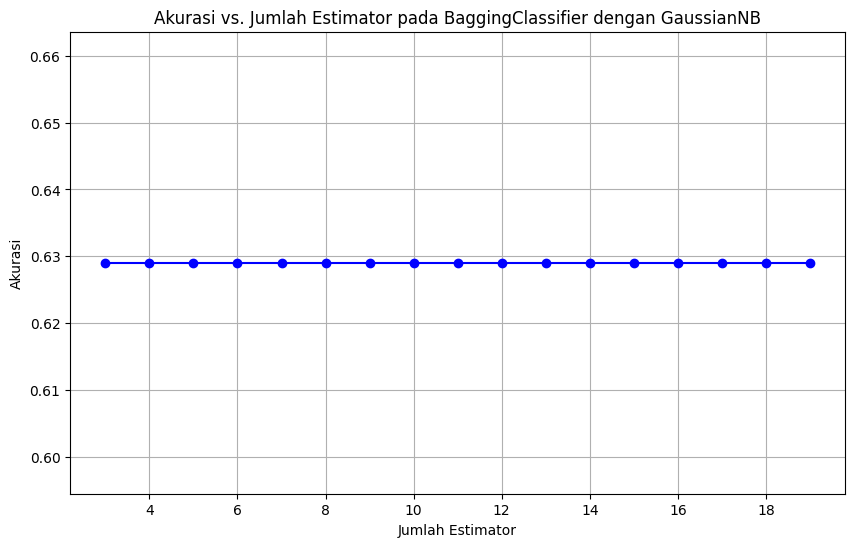

Prediksi untuk input baru: 1


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Membaca dataset Habermans Survival
df = pd.read_csv('haberman_s_survival.csv')

# Memisahkan fitur dan label
X = df[['age', 'operation_year', 'positive_auxillary_nodes']].values
y = df['survival_status'].values

# Mengencode label kelas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalisasi data fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=0)

# Inisialisasi list untuk menyimpan hasil
accuracies = []

# Loop untuk nilai n_estimators dari 3 hingga 19
for n in range(3, 20):
    # Inisialisasi BaggingClassifier dengan GaussianNB sebagai estimator dasar
    clf = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=n, random_state=0)
    
    # Latih model dengan data pelatihan
    clf.fit(X_train, y_train)
    
    # Prediksi untuk data pengujian
    y_pred = clf.predict(X_test)
    
    # Hitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((n, accuracy))
    print(f'n_estimators={n}, Akurasi: {accuracy:.2f}')

# Memisahkan nilai n_estimators dan akurasi untuk plotting
n_estimators, accuracy_values = zip(*accuracies)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, accuracy_values, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Estimator')
plt.ylabel('Akurasi')
plt.title('Akurasi vs. Jumlah Estimator pada BaggingClassifier dengan GaussianNB')
plt.grid(True)
plt.show()

# Normalisasi data baru sebelum prediksi
x_baru = [[50, 65, 3]]
x_baru_scaled = scaler.transform(x_baru)
prediction = clf.predict(x_baru_scaled)
predicted_class = label_encoder.inverse_transform(prediction)
print(f'Prediksi untuk input baru: {predicted_class[0]}')


# Batas Coba

GNB

   age  operation_year  positive_auxillary_nodes  survival_status
0   30              64                         1                1
1   30              62                         3                1
2   30              65                         0                1
3   31              59                         2                1
4   31              65                         4                1

n_estimators=3, Akurasi: 0.63, Precision: 0.63, Recall: 0.56
n_estimators=4, Akurasi: 0.63, Precision: 0.63, Recall: 0.56
n_estimators=5, Akurasi: 0.63, Precision: 0.65, Recall: 0.55
n_estimators=6, Akurasi: 0.63, Precision: 0.69, Recall: 0.55
n_estimators=7, Akurasi: 0.63, Precision: 0.65, Recall: 0.55
n_estimators=8, Akurasi: 0.63, Precision: 0.63, Recall: 0.56
n_estimators=9, Akurasi: 0.63, Precision: 0.63, Recall: 0.56
n_estimators=10, Akurasi: 0.63, Precision: 0.63, Recall: 0.56
n_estimators=11, Akurasi: 0.63, Precision: 0.63, Recall: 0.56
n_estimators=12, Akurasi: 0.63, Precision: 0.63, Rec

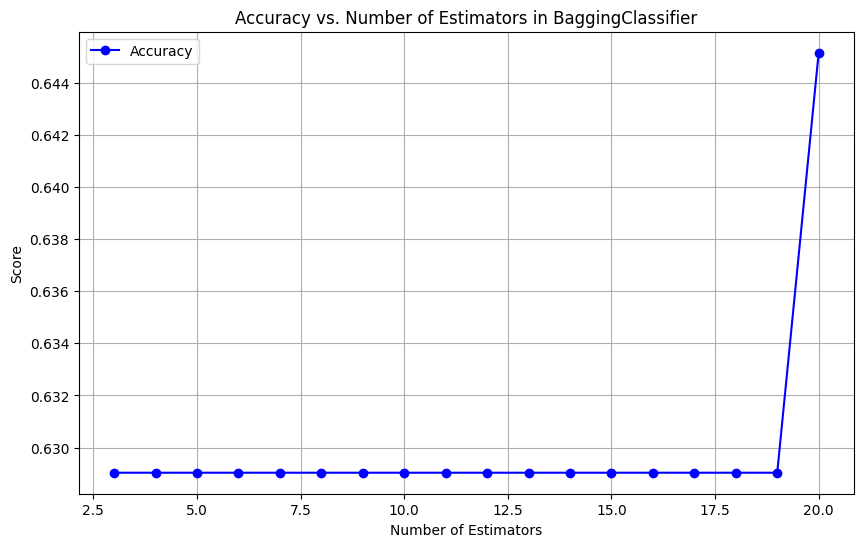

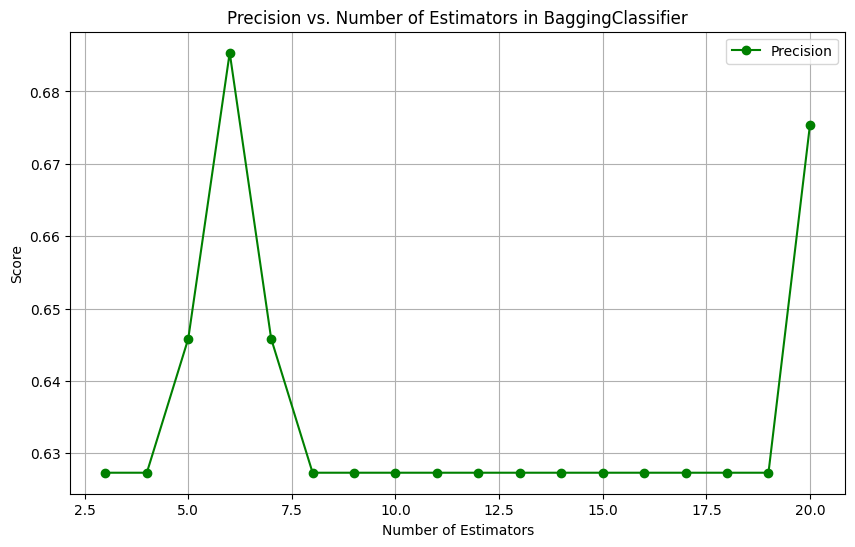

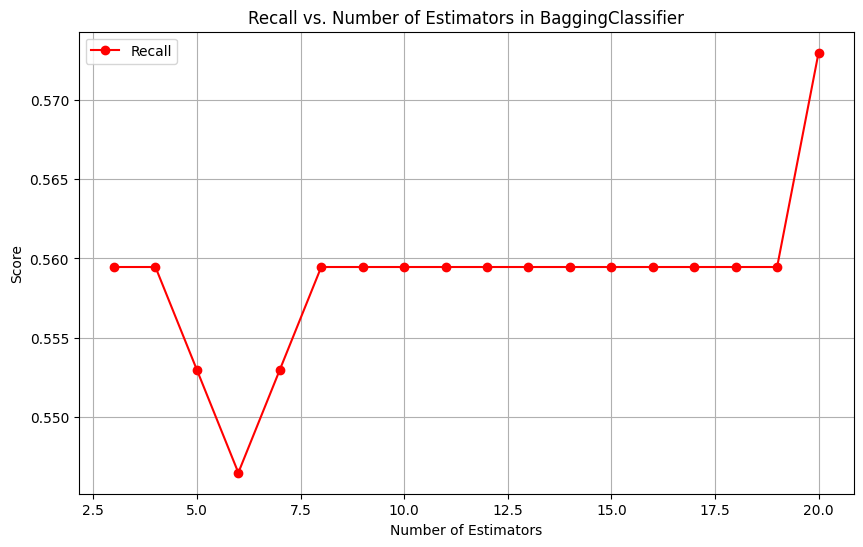

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Muat dataset
data = pd.read_csv('haberman_s_survival.csv')

# Menampilkan beberapa baris dari dataset untuk memastikan pemuatan berhasil
print(data.head())

# Memisahkan fitur dan kelas
feature_columns = ['age', 'operation_year', 'positive_auxillary_nodes']
X = data[feature_columns].values
y = data['survival_status'].values  # Misalkan 'Survival' adalah kolom kelas yang sesuai dengan data Anda

# Pisahkan dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inisialisasi list untuk menyimpan hasil
accuracies = []
precisions = []
recalls = []

print()

# Loop untuk nilai n_estimators dari 3 hingga 20
for n in range(3, 21):
    # Inisialisasi BaggingClassifier dengan GaussianNB sebagai estimator
    clf_gnb = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=n, random_state=0)
    
    # Latih model dengan data pelatihan
    clf_gnb.fit(X_train, y_train)
    
    # Prediksi untuk data pengujian
    y_pred_gnb = clf_gnb.predict(X_test)
    
    # Hitung akurasi, precision, dan recall
    accuracy = accuracy_score(y_test, y_pred_gnb)
    precision = precision_score(y_test, y_pred_gnb, average='macro')
    recall = recall_score(y_test, y_pred_gnb, average='macro')
    
    accuracies.append((n, accuracy))
    precisions.append((n, precision))
    recalls.append((n, recall))
    
    print(f'n_estimators={n}, Akurasi: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

print()

# Prediksi untuk input baru
x_baru = [[43, 63, 14]]  # Contoh data baru, sesuaikan dengan struktur fitur yang ada pada dataset Anda
prediction = clf_gnb.predict(x_baru)
print(f'Prediksi: {prediction}')

# Memisahkan nilai n_estimators, akurasi, precision, dan recall untuk plotting
n_estimators, accuracy_values = zip(*accuracies)
_, precision_values = zip(*precisions)
_, recall_values = zip(*recalls)

# Membuat plot untuk akurasi
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, accuracy_values, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Accuracy vs. Number of Estimators in BaggingClassifier')
plt.grid(True)
plt.legend()
plt.show()

# Membuat plot untuk precision
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, precision_values, marker='o', linestyle='-', color='g', label='Precision')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Precision vs. Number of Estimators in BaggingClassifier')
plt.grid(True)
plt.legend()
plt.show()

# Membuat plot untuk recall
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, recall_values, marker='o', linestyle='-', color='r', label='Recall')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Recall vs. Number of Estimators in BaggingClassifier')
plt.grid(True)
plt.legend()
plt.show()


KNN 

   Age  Year  Nodes  Survival
0   30    64      1         1
1   30    62      3         1
2   30    65      0         1
3   31    59      2         1
4   31    65      4         1

n_estimators=3, Akurasi: 0.61, Precision: 0.59, Recall: 0.55
n_estimators=4, Akurasi: 0.63, Precision: 0.63, Recall: 0.56
n_estimators=5, Akurasi: 0.65, Precision: 0.65, Recall: 0.58
n_estimators=6, Akurasi: 0.66, Precision: 0.70, Recall: 0.59
n_estimators=7, Akurasi: 0.66, Precision: 0.70, Recall: 0.59
n_estimators=8, Akurasi: 0.66, Precision: 0.70, Recall: 0.59
n_estimators=9, Akurasi: 0.65, Precision: 0.68, Recall: 0.57
n_estimators=10, Akurasi: 0.65, Precision: 0.68, Recall: 0.57
n_estimators=11, Akurasi: 0.65, Precision: 0.68, Recall: 0.57
n_estimators=12, Akurasi: 0.65, Precision: 0.68, Recall: 0.57
n_estimators=13, Akurasi: 0.63, Precision: 0.63, Recall: 0.56
n_estimators=14, Akurasi: 0.65, Precision: 0.68, Recall: 0.57
n_estimators=15, Akurasi: 0.65, Precision: 0.68, Recall: 0.57
n_estimators=16, Aku

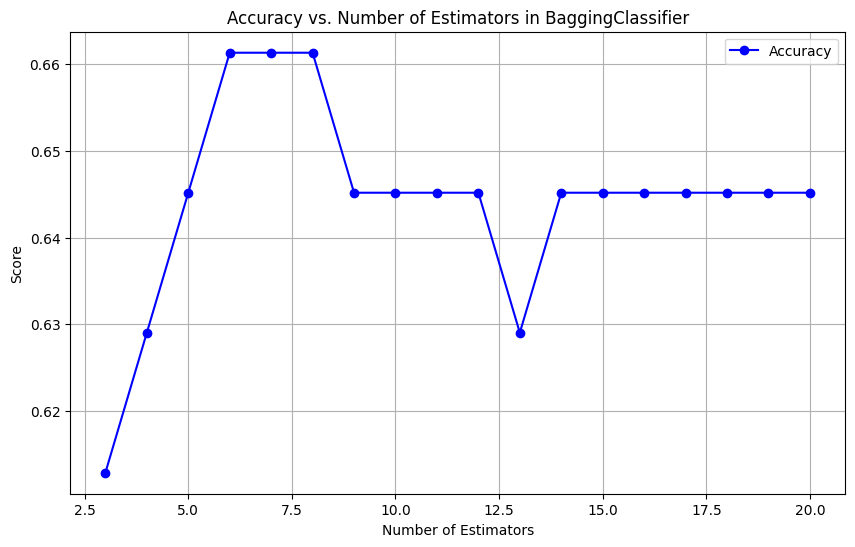

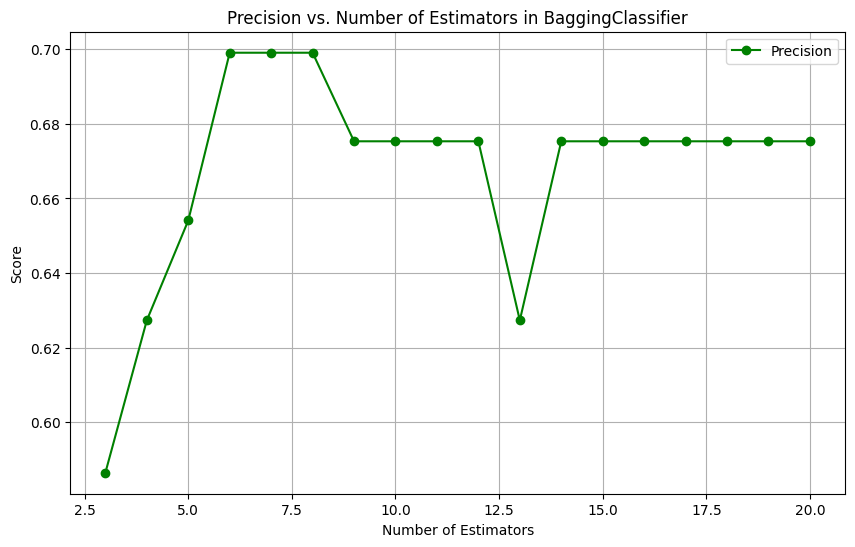

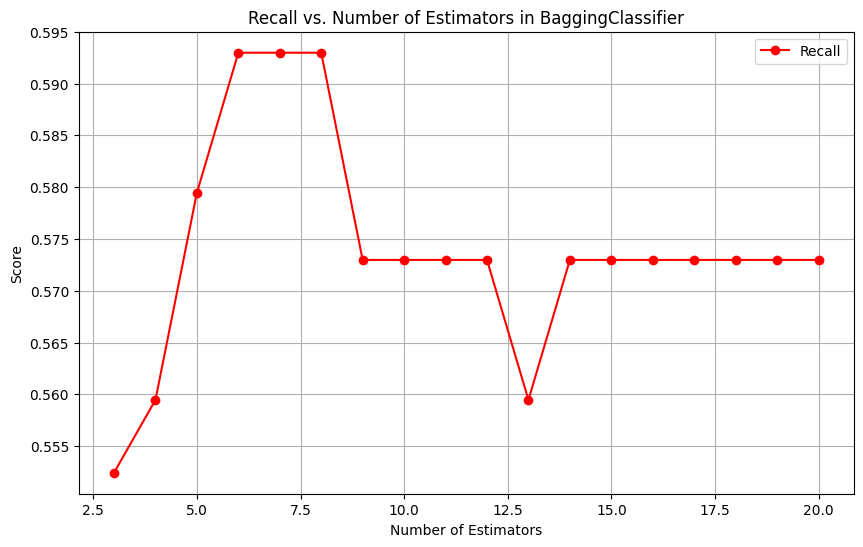

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Muat dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['Age', 'Year', 'Nodes', 'Survival']
data = pd.read_csv(url, names=column_names)

# Menampilkan beberapa baris dari dataset untuk memastikan pemuatan berhasil
print(data.head())

# Memisahkan fitur dan kelas
X = data[['Age', 'Year', 'Nodes']].values
y = data['Survival'].values

# Pisahkan dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Inisialisasi list untuk menyimpan hasil
accuracies = []
precisions = []
recalls = []

print()

# Loop untuk nilai n_estimators dari 3 hingga 20
for n in range(3, 21):
    # Inisialisasi BaggingClassifier dengan KNeighborsClassifier sebagai estimator
    clf_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=n, random_state=0)
    
    # Latih model dengan data pelatihan
    clf_knn.fit(X_train, y_train)
    
    # Prediksi untuk data pengujian
    y_pred_knn = clf_knn.predict(X_test)
    
    # Hitung akurasi, precision, dan recall
    accuracy = accuracy_score(y_test, y_pred_knn)
    precision = precision_score(y_test, y_pred_knn, average='macro')
    recall = recall_score(y_test, y_pred_knn, average='macro')
    
    accuracies.append((n, accuracy))
    precisions.append((n, precision))
    recalls.append((n, recall))
    
    print(f'n_estimators={n}, Akurasi: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')

print()

# Memisahkan nilai n_estimators, akurasi, precision, dan recall untuk plotting
n_estimators, accuracy_values = zip(*accuracies)
_, precision_values = zip(*precisions)
_, recall_values = zip(*recalls)

# Membuat plot untuk akurasi
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, accuracy_values, marker='o', linestyle='-', color='b', label='Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Accuracy vs. Number of Estimators in BaggingClassifier')
plt.grid(True)
plt.legend()
plt.show()

# Membuat plot untuk precision
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, precision_values, marker='o', linestyle='-', color='g', label='Precision')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Precision vs. Number of Estimators in BaggingClassifier')
plt.grid(True)
plt.legend()
plt.show()

# Membuat plot untuk recall
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, recall_values, marker='o', linestyle='-', color='r', label='Recall')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.title('Recall vs. Number of Estimators in BaggingClassifier')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Muat dataset "habermans survival"
df = pd.read_csv('haberman_s_survival.csv')

# Tampilkan beberapa baris dari dataset untuk memastikan pemuatan berhasil
print(df.head())

# 2. Memisahkan fitur dan label
feature_columns = ['age', 'operation_year', 'positive_auxillary_nodes']
X = df[feature_columns].values
y = df['survival_status'].values

# 3. Mengencode label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 4. Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Inisialisasi BaggingClassifier dengan GaussianNB sebagai estimator
clf = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=6, random_state=0)

# 7. Cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

# 8. Latih model dengan seluruh data pelatihan
clf.fit(X_train, y_train)

# 9. Prediksi untuk data pengujian
y_pred = clf.predict(X_test)

# 10. Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

# 11. Prediksi untuk input baru
new_input = [[43, 63, 14]]  # Masukkan nilai yang sesuai untuk data baru
new_input_normalized = scaler.transform(new_input)
prediction = clf.predict(new_input_normalized)
predicted_class = label_encoder.inverse_transform(prediction)
print(f'Prediksi untuk input {new_input[0]}: {predicted_class[0]}')


   age  operation_year  positive_auxillary_nodes  survival_status
0   30              64                         1                1
1   30              62                         3                1
2   30              65                         0                1
3   31              59                         2                1
4   31              65                         4                1
Cross-validation scores: [0.71428571 0.79591837 0.83673469 0.79591837 0.6875    ]
Mean cross-validation score: 0.77
Akurasi: 0.63
Prediksi untuk input [43, 63, 14]: 1


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Muat dataset
df = pd.read_csv('haberman_s_survival.csv')

# 2. Memisahkan fitur dan label
feature_columns = ['age', 'operation_year', 'positive_auxillary_nodes']
X = df[feature_columns].values
y = df['survival_status'].values

# 3. Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 4. Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# 5. Inisialisasi KNeighborsClassifier dengan k=5
classifier = KNeighborsClassifier(n_neighbors=5)

# Latih model pada set pelatihan
classifier.fit(X_train, y_train)

# Evaluasi model pada data pelatihan
y_train_pred = classifier.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy Train: {accuracy_train:.2f}")

# Evaluasi model pada data pengujian
y_test_pred = classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy Test: {accuracy_test:.2f}")

# 6. Prediksi untuk instance baru
new_data = [[43, 63, 14]]  # Masukkan nilai yang sesuai untuk data baru
new_prediction = classifier.predict(new_data)
new_prediction_label = label_encoder.inverse_transform(new_prediction)
print(f"Prediksi untuk data input baru {new_data[0]}: {new_prediction_label[0]}")

Accuracy Train: 0.82
Accuracy Test: 0.63
Prediksi untuk data input baru [43, 63, 14]: 1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0350fc47-628b-4542-a15c-707d15948ab0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>